# MNIST分类

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
tf.reset_default_graph()
#定义占位符
x = tf.placeholder(tf.float32,[None,784]) #28*28=784
y = tf.placeholder(tf.float32,[None,10]) #0~9,None表示输入任意数量的数据

In [3]:
#定义学习参数
W = tf.Variable(tf.random_normal([784,10])) #权重
b = tf.Variable(tf.zeros([10])) #偏置

In [4]:
#定义输出节点,正向传输
pred = tf.nn.softmax(tf.matmul(x,W) + b) #pred = W*x + b

In [6]:
#定义方向传播结构
#损失函数
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred),reduction_indices=1))
#学习率
learning_rate = 0.01
#优化器--这里使用梯度下降
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

## 训练、保存模型

Epoch: 0001 cost= 8.438262092
Epoch: 0002 cost= 4.536028973
Epoch: 0003 cost= 3.147904651
Epoch: 0004 cost= 2.483212258
Epoch: 0005 cost= 2.099999088
Epoch: 0006 cost= 1.851285437
Epoch: 0007 cost= 1.673957695
Epoch: 0008 cost= 1.541807865
Epoch: 0009 cost= 1.436720795
Epoch: 0010 cost= 1.353604300
Epoch: 0011 cost= 1.283974256
Epoch: 0012 cost= 1.224813937
Epoch: 0013 cost= 1.174841054
Epoch: 0014 cost= 1.131299670
Epoch: 0015 cost= 1.092505169
Epoch: 0016 cost= 1.058963328
Epoch: 0017 cost= 1.028338315
Epoch: 0018 cost= 1.001090710
Epoch: 0019 cost= 0.976081888
Epoch: 0020 cost= 0.953427347
Epoch: 0021 cost= 0.932856439
Epoch: 0022 cost= 0.913790750
Epoch: 0023 cost= 0.895938686
Epoch: 0024 cost= 0.879305559
Epoch: 0025 cost= 0.864044051
Epoch: 0026 cost= 0.849593503
Epoch: 0027 cost= 0.836121174
Epoch: 0028 cost= 0.823617652
Epoch: 0029 cost= 0.811508149
Epoch: 0030 cost= 0.800385143
Epoch: 0031 cost= 0.789790993
Epoch: 0032 cost= 0.779487958
Epoch: 0033 cost= 0.769856245
Epoch: 003

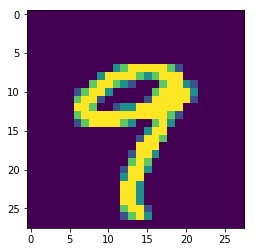

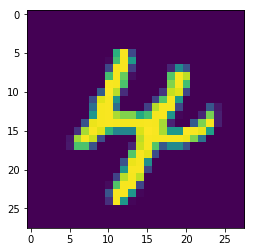

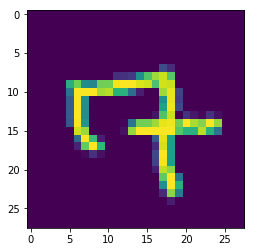

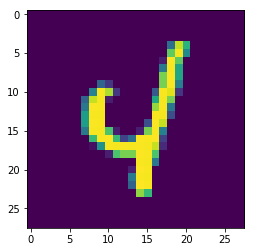

In [28]:
#迭代次数
training_epochs = 200
#batch_size 每次训练取的数据量
batch_size = 100
#中间状态打印间隔
display_step = 1 

#模型保存路径
saver = tf.train.Saver()
model_path = "log/521model.ckpt"

#启动Session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) #Initializing OP
    
    #启动循环开始训练
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples / batch_size)
        #循环所有数据集
        for i in range(total_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            #运行优化器
            _, c = sess.run([optimizer,cost],feed_dict={x:batch_xs,y:batch_ys})
            #平均损失
            avg_cost += c /total_batch
        #显示信息
        if (epoch+1) % display_step == 0:
            print("Epoch:",'%04d' % (epoch+1),"cost=","{:.9f}".format(avg_cost))
    print("Finished!")
    
    #测试模型
    correct_prediction = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
    #计算精确率
    accuracy = f=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    print("Accuracy:",accuracy.eval({x:mnist.test.images,y:mnist.test.labels}))
    
    #保存模型
    save_path = saver.save(sess,model_path)
    print("Model saved in file: %s" % save_path)
    
#测试模型    
import pylab
print ("Starting restore Model and the second Session...")
with tf.Session() as sess:
    #初始化变量
    sess.run(tf.global_variables_initializer())
    #恢复模型变量
    saver.restore(sess,model_path)
    
    #测试模型
    correct_predict = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
    #计算精确度
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    print("Accuracy:",accuracy.eval({x:mnist.test.images,y:mnist.test.labels}))
    
    output = tf.argmax(pred,1)
    batch_xs,batch_ys = mnist.train.next_batch(4)
    outputval,predv = sess.run([output,pred],feed_dict={x:batch_xs,y:batch_ys})
    print(outputval,predv,batch_ys)
    
    im = batch_xs[0]
    im = im.reshape(-1,28)
    pylab.imshow(im)
    pylab.show()
    
    im = batch_xs[1]
    im = im.reshape(-1,28)
    pylab.imshow(im)
    pylab.show()
    
    im = batch_xs[2]
    im = im.reshape(-1,28)
    pylab.imshow(im)
    pylab.show()
    
    im = batch_xs[3]
    im = im.reshape(-1,28)
    pylab.imshow(im)
    pylab.show()

## 读取模型

Starting restore Model and the second Session...
INFO:tensorflow:Restoring parameters from log/521model.ckpt
Accuracy: 0.8951
[3 8 9 3] [[  7.63801436e-05   5.24713499e-08   2.51087506e-04   5.01496434e-01
    5.49414707e-03   4.34229255e-01   1.22712390e-05   2.13345211e-05
    5.81697486e-02   2.49351840e-04]
 [  2.18151044e-07   1.88642346e-08   5.66618910e-05   2.00767204e-06
    1.82367312e-05   1.00928128e-06   1.53138861e-03   6.86656731e-10
    9.83943939e-01   1.44465650e-02]
 [  1.46791624e-11   1.27623538e-08   5.29598424e-07   2.04366283e-04
    2.95282528e-03   4.79596711e-05   4.70274671e-07   4.86846664e-04
    1.27759585e-02   9.83531058e-01]
 [  2.43412615e-06   1.85160708e-04   4.58794233e-07   9.67688620e-01
    6.22429130e-09   3.19510102e-02   1.43568186e-05   1.57538947e-04
    2.33672196e-07   2.21335142e-07]] [[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  1.  0.  0. 

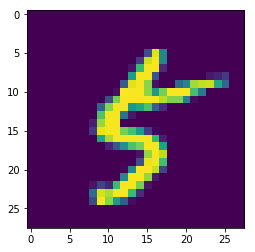

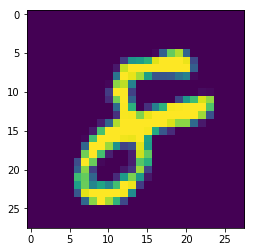

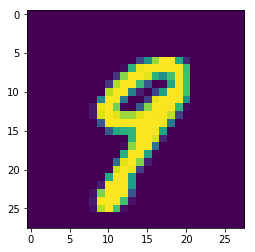

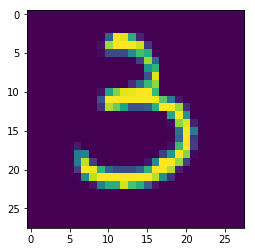

In [29]:
import pylab
print ("Starting restore Model and the second Session...")
with tf.Session() as sess:
    #初始化变量
    sess.run(tf.global_variables_initializer())
    #恢复模型变量
    saver.restore(sess,model_path)
    
    #测试模型
    correct_predict = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
    #计算精确度
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    print("Accuracy:",accuracy.eval({x:mnist.test.images,y:mnist.test.labels}))
    
    output = tf.argmax(pred,1)
    batch_xs,batch_ys = mnist.train.next_batch(4)
    outputval,predv = sess.run([output,pred],feed_dict={x:batch_xs,y:batch_ys})
    print(outputval,predv,batch_ys)
    
    im = batch_xs[0]
    im = im.reshape(-1,28)
    pylab.imshow(im)
    pylab.show()
    
    im = batch_xs[1]
    im = im.reshape(-1,28)
    pylab.imshow(im)
    pylab.show()
    
    im = batch_xs[2]
    im = im.reshape(-1,28)
    pylab.imshow(im)
    pylab.show()
    
    im = batch_xs[3]
    im = im.reshape(-1,28)
    pylab.imshow(im)
    pylab.show()